# Дипломная работа по курсу «Python для анализа данных»

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns

#Ставим стиль для графиков
plt.style.use('ggplot')

#Убираем лимиты на кол-во строк
pd.options.display.max_rows = None

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

#### 1. Загрузить файл hr.csv (можно найти во сложении к заданию)

In [2]:
hr_dataset = pd.read_csv('HR.csv')
hr_dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
print('Unique sales:\n', hr_dataset['sales'].unique(), '\n')
print('Unique satisfaction_level:\n', hr_dataset['satisfaction_level'].unique(), '\n')
print('Unique last_evaluation:\n', hr_dataset['last_evaluation'].unique(), '\n')
print('Unique salary:\n', hr_dataset['salary'].unique())

Unique sales:
 ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD'] 

Unique satisfaction_level:
 [0.38 0.8  0.11 0.72 0.37 0.41 0.1  0.92 0.89 0.42 0.45 0.84 0.36 0.78
 0.76 0.09 0.46 0.4  0.82 0.87 0.57 0.43 0.13 0.44 0.39 0.85 0.81 0.9
 0.74 0.79 0.17 0.24 0.91 0.71 0.86 0.14 0.75 0.7  0.31 0.73 0.83 0.32
 0.54 0.27 0.77 0.88 0.48 0.19 0.6  0.12 0.61 0.33 0.56 0.47 0.28 0.55
 0.53 0.59 0.66 0.25 0.34 0.58 0.51 0.35 0.64 0.5  0.23 0.15 0.49 0.3
 0.63 0.21 0.62 0.29 0.2  0.16 0.65 0.68 0.67 0.22 0.26 0.99 0.98 1.
 0.52 0.93 0.97 0.69 0.94 0.96 0.18 0.95] 

Unique last_evaluation:
 [0.53 0.86 0.88 0.87 0.52 0.5  0.77 0.85 1.   0.54 0.81 0.92 0.55 0.56
 0.47 0.99 0.51 0.89 0.83 0.95 0.57 0.49 0.46 0.62 0.94 0.48 0.8  0.74
 0.7  0.78 0.91 0.93 0.98 0.97 0.79 0.59 0.84 0.45 0.96 0.68 0.82 0.9
 0.71 0.6  0.65 0.58 0.72 0.67 0.75 0.73 0.63 0.61 0.76 0.66 0.69 0.37
 0.64 0.39 0.41 0.43 0.44 0.36 0.38 0.4  0.42] 

Unique salary:
 ['low' 'mediu

#### Заменим все текстовые данные на численные

In [4]:
hr_dataset.loc[hr_dataset["salary"] == "low","salary"] = 1
hr_dataset.loc[hr_dataset["salary"] == "medium","salary"] = 2
hr_dataset.loc[hr_dataset["salary"] == "high","salary"] = 3

enc_sales = LabelEncoder()
enc_sales.fit(hr_dataset['sales'])
keys = enc_sales.classes_
values = enc_sales.transform(enc_sales.classes_)
sales_dictionary = dict(zip(values, keys))
print(sales_dictionary)
hr_dataset['sales'] = enc_sales.transform(hr_dataset['sales'])

{0: 'IT', 1: 'RandD', 2: 'accounting', 3: 'hr', 4: 'management', 5: 'marketing', 6: 'product_mng', 7: 'sales', 8: 'support', 9: 'technical'}


In [5]:
hr_dataset.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


#### 2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [6]:
hr_description = hr_dataset.describe()
hr_description.loc['mode'] = hr_dataset.mode().iloc[0]
hr_description

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,5.870525,1.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,2.868786,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,4.000000,1.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,7.000000,2.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,8.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,9.000000,3.000000
mode,0.100000,0.550000,4.000000,135.000000,3.000000,0.000000,0.000000,0.000000,7.000000,1.000000


#### 3. Рассчитать и визуализировать корреляционную матрицу для переменных

In [7]:
hr_dataset.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.003153,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.007772,-0.013002
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.009268,-0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,0.003913,-0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.018010,0.048715
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.003425,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,0.032105,-0.157898
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,-0.027336,0.098119
sales,0.003153,0.007772,0.009268,0.003913,-0.018010,0.003425,0.032105,-0.027336,1.000000,-0.043081
salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,-0.043081,1.000000


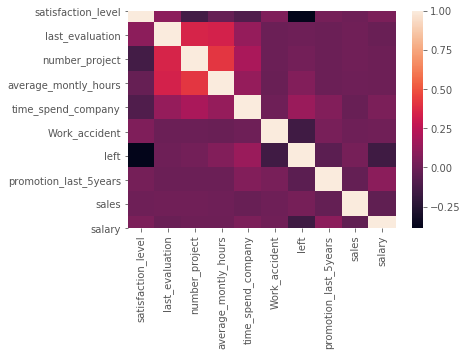

In [8]:
#Для визуализации корреляционной матрицы построим heatmap
sns.heatmap(hr_dataset.corr())
#На матрице сразу видны области для дальнейшего анализа:
#1) Прямая зависимость между показатеями кол-ва проектов, оценка сотрудника и срендее кол-во часов в месяц
#2) Обратная зависимость между удовлетворенностью и уходом сотруднка

#### 4. Визуализировать несколько взаимосвязей между переменными

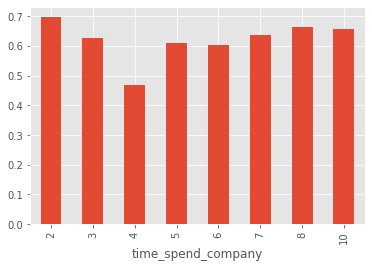

In [9]:
#Проверим влияние времени работы в компании на уровень удовлетворенности
project_df = hr_dataset.groupby('time_spend_company').mean()['satisfaction_level']
project_df.plot(kind='bar')
#Видим, что "яма удовлетворенности" находится в районе 4 лет работы. 
#Скорее всего это связанно с наличием/отсутствием продвижения на следующую ступень в этот период

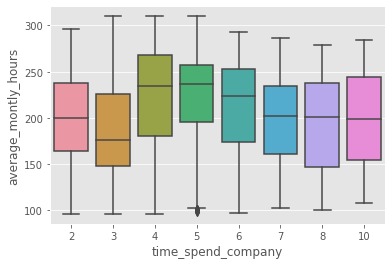

In [10]:
#Проверим загрузку сотрудников в разрезе периода работы
sns.boxplot(x="time_spend_company", y="average_montly_hours", data=hr_dataset)
#Как видно из графика, сотрудников со стажем 4 года загружают больше остальных
#Это так же может являться причиной низкой удовлетворенности этой группы, показанной выше

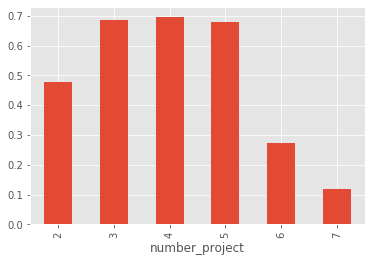

In [11]:
# Проверим зависимость уровня удовлетворенности от кол-ва проектов
project_df = hr_dataset.groupby('number_project').mean()['satisfaction_level']
project_df.plot(kind='bar')
#Видим, что максимальный уровень удовлетворенности достигается при загрузке в 4 проектах
#Оптимальный диапазон загрузки - от 3 до 5 проектов

#### 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными

In [12]:
# Проверим гипотезу о том, что кол-во проектов не влияет на рабочее время сотрудника

projects_less_6 = hr_dataset[hr_dataset['number_project'] <= 5]['average_montly_hours']
projects_more_5 = hr_dataset[hr_dataset['number_project'] > 5]['average_montly_hours']

ttest_ind(projects_less_6, projects_more_5)
# p-value равно 9.35271628256402e-285, что намного меньше стандартной альфа ошибки 0.05, 
# поэтому мы отвергаем нулевую гипотезу и можем сказать, 
# что имеется статистическое различие среднемесячного времени в зависимости от кол-ва проектов

Ttest_indResult(statistic=-36.85740680935796, pvalue=9.35271628256402e-285)

In [13]:
# Проверим нулевую гипотезу о том, что загруженность не влияет на решение об увольнении
left = hr_dataset[hr_dataset['left'] == 1]['average_montly_hours']
stayed = hr_dataset[hr_dataset['left'] == 0]['average_montly_hours']

ttest_ind(left, stayed)
# p-value равно 2.3113035567540143e-18, что намного меньше стандартной альфа ошибки 0.05, 
# поэтому мы отвергаем нулевую гипотезу и можем сказать, 
# что решение об увольнение зависит от загруженности сотрудника

Ttest_indResult(statistic=8.752254731850009, pvalue=2.3113035567540143e-18)

#### 6. Рассчитать сколько работников работает в каждом департаменте

In [14]:
#Группируем выборку по департаментам с функцией count
departments = hr_dataset.groupby('sales').count().reset_index()[['sales', 'number_project']]
departments.columns = ['department', 'workers_count']
#Приведем названия департаментов к исходному виду
departments['department'] = departments['department'].apply(lambda x: sales_dictionary[x])
departments
#Самый крупный департамент по численности сотрудников - Продажи
#Самый маленький - менеджмент

,department,workers_count
0,IT,1227
1,RandD,787
2,accounting,767
3,hr,739
4,management,630
5,marketing,858
6,product_mng,902
7,sales,4140
8,support,2229
9,technical,2720


#### 7. Показать распределение сотрудников по зарплатам

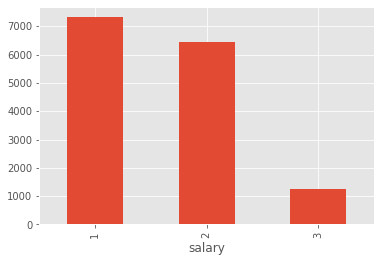

In [15]:
#Формируем группировку по по уровню зароботной платы
salary = hr_dataset.groupby('salary').count()['number_project']
salary.plot(kind='bar')
#Большая часть сотрудников получают низку или среднюю заработную плату. 
#Кол-во сотрудников с высокой з/п значительно ниже

#### 8. Показать распределение сотрудников по зарплатам совместно с департаментами

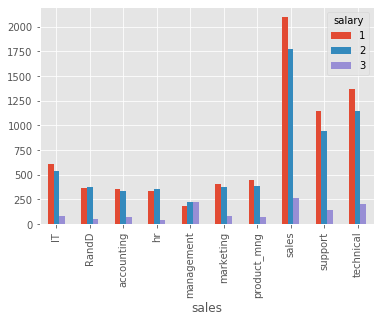

In [16]:
#Сгруппируем выборку по ключам з/п и департамент
dep_salary = hr_dataset.groupby(['sales', 'salary']).count()['number_project']
dep_salary = dep_salary.unstack().reset_index()
# #Приведем названия департаментов к исходному виду
dep_salary['sales'] = dep_salary['sales'].apply(lambda x: sales_dictionary[x])
dep_salary.set_index('sales', inplace=True)
dep_salary.plot(kind='bar')
#В большинстве департаментов созраняется распределение зарплат кроме менеджмента
#В управленческом департаменте относительный уровень средних и высоких зарплат значитьельно выше, чем в среднем по компании

#### 9. Сколько сотрудников покинули компанию

In [17]:
#Отфильтруем выборку по критерию left и посчитаем длинну
left = hr_dataset[(hr_dataset['left'] == 1)]
len(left)

3571

#### 10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

### Расчитаем срез корреляционной матрицы для поля left. 

#### Сразу можем сказать, что:
1. Удовлетворенность имеет сильное обратное воздействие
2. Зарплата имеет обратное воздействие
3. Срок работы прямо влияет на решение об увольнении
4. Наличие Work_accident имеет обратное воздействие

In [18]:
corr_df = hr_dataset.corr().reset_index().groupby('index')[['left']].sum()
corr_df['left'] = abs(corr_df['left'])
corr_df.sort_values('left').style.bar()

,left
index,
last_evaluation,0.00656712
number_project,0.0237872
sales,0.0321053
promotion_last_5years,0.0617881
average_montly_hours,0.0712872
time_spend_company,0.144822
Work_accident,0.154622
salary,0.157898
satisfaction_level,0.388375


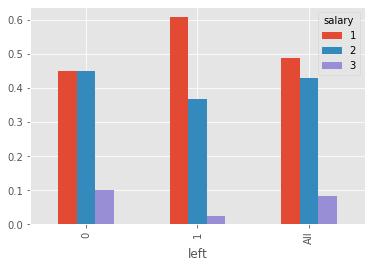

In [19]:
#Построим bar-граффик зависимости увольнения от з\п
salaryleft = hr_dataset.pivot_table(index = 'left', columns = 'salary', values = 'number_project', aggfunc = 'count', margins=True)
salaryleft_2 = salaryleft.div( salaryleft.iloc[:,-1], axis=0 )
salaryleft_2[[1, 2 ,3]].plot(kind='bar')
#Видно, что люди с низкой з\п увольняются чаще остальных

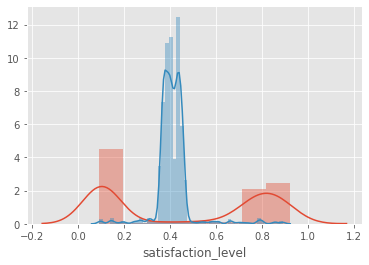

In [20]:
#Построим распределение удовлетворенности среди ушедших сотрудников 
#для эффективных (['last_evaluation'] >= 0.7) 
#и неэффективных (['last_evaluation'] < 0.7)
left = hr_dataset[(hr_dataset['left'] == 1)]
no_left = hr_dataset[(hr_dataset['left'] == 0)]
left_good = hr_dataset[(hr_dataset['left'] == 1) & (hr_dataset['last_evaluation'] >= 0.7)]
left_bad = hr_dataset[(hr_dataset['left'] == 1) & (hr_dataset['last_evaluation'] < 0.7)]

sns.distplot(left_good['satisfaction_level'], hist=True)
sns.distplot(left_bad['satisfaction_level'], hist=True)
#На гистограмме видим, что эффективные сотрудники были крайне неудовлетворены или полностью удовлетворены работой
#В то же время низкоэффективные сотрудники были удовлетворены ниже среднего

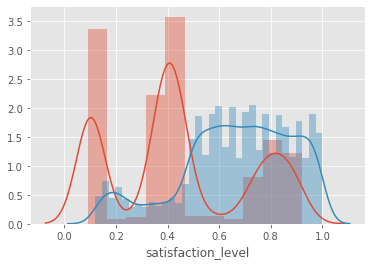

In [21]:
#Проверим распределение удовлетворенности у работающих и ушедших сотрудников


sns.distplot(left['satisfaction_level'], hist=True)
sns.distplot(no_left['satisfaction_level'], hist=True)
# На гистограмме видно 3 группы удовлетворенности для ушедших людей:

# 1) Крайне низкая (0.1) - данный уровень встречается преимущественно у ушедших сотрудников.
# Из граффика выше мы знаем, что  в данную группу входят преимущественно эффективные сотрудники.
# Это группа риска компании. На них необходимо смотреть в первую очередь

# 2) Очень высокая  (0.75) - в данную группу входят преимущественно эффективные сотрудники. 
# Их сложно выделить от коллег, которые не собираются уходить, но так же удовлетворены. 
# Для ранего прогнозирования необходимо рассмотреть дополнительные факторы

# 3) Ниже среднего (0.4) - в данной группе находятся преимущественно низкоэффективные сотрудники.
